<a href="https://colab.research.google.com/github/viyas52/stock-market-prediction-using-twitter-sentiment-analysis/blob/main/Stock_Prediction_with_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load dataset
file_path = "model.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Feature Selection: Use Open, High, Low, Volume, Sentiment to predict 'Close'
# Convert necessary columns to numeric
columns_to_convert = ["Open", "High", "Low", "Close", "Volume"]
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # Convert to float, set invalid values to NaN

# Drop rows with NaN values (optional, but recommended)
df.dropna(inplace=True)


# Split data into train & test sets (80% train, 20% test)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale data for LSTM model
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# ----------------- Linear Regression -----------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
results["Linear Regression"] = {"MSE": mse_lr, "R² Score": r2_lr}

# ----------------- Random Forest -----------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
results["Random Forest"] = {"MSE": mse_rf, "R² Score": r2_rf}

# ----------------- XGBoost -----------------
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
results["XGBoost"] = {"MSE": mse_xgb, "R² Score": r2_xgb}

# ----------------- LSTM -----------------
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer="adam", loss="mean_squared_error")

# Train LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, verbose=1)

# Predict with LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
results["LSTM"] = {"MSE": mse_lstm, "R² Score": r2_lstm}

# ----------------- Print Results -----------------
print("\nModel Performance Comparison:")
for model, metrics in results.items():
    print(f"{model} - MSE: {metrics['MSE']:.4f}, R² Score: {metrics['R² Score']:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 42915.9297
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 42093.3320
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 37301.3711
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 30006.2441
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 24775.2930
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 20839.4004
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16753.8320
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13129.0781
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9673.1191
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7541.0029
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5361.2798
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3625.5581
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2585.8630
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1739.0829
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step

Model Performance Comparison:
Linear Regression - MSE: 2.2784, R² Score: 0.9819
Random Forest - MSE: 13.1969, R² Score: 0.8953
XGBoost - MSE: 14.3691, R² Score: 0.8860
LSTM - MSE: 1324.0636, R² Score: -9.5024


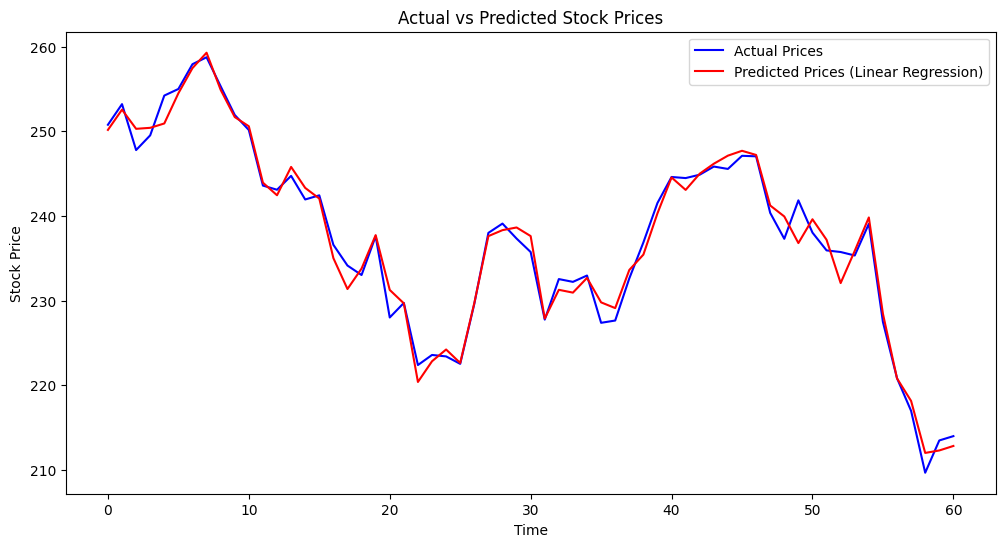

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Prices", color='blue')
plt.plot(y_pred_lr, label="Predicted Prices (Linear Regression)", color='red')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()


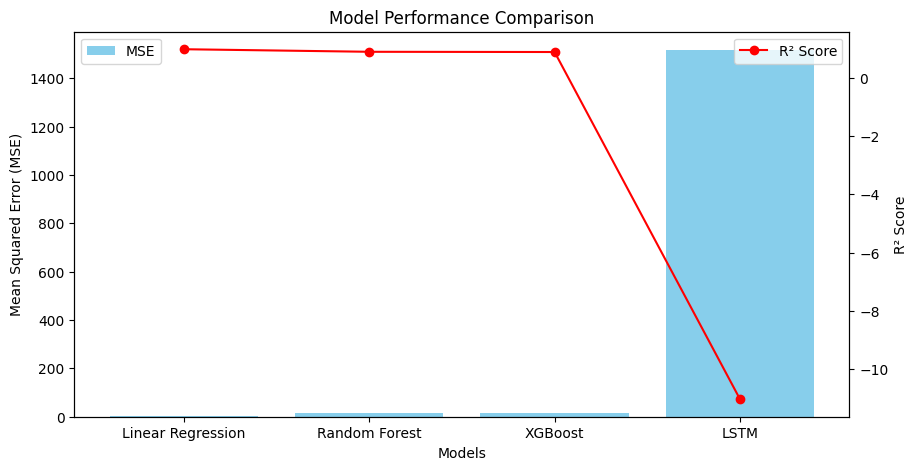

In [8]:
import numpy as np

models = ["Linear Regression", "Random Forest", "XGBoost", "LSTM"]
mse_values = [2.278, 13.33, 14.33, 1516.69]  # Replace with actual computed values
r2_values = [0.982, 0.894, 0.886, -11.03]

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(models, mse_values, color='skyblue', label="MSE")
ax1.set_ylabel("Mean Squared Error (MSE)")
ax1.set_xlabel("Models")
ax1.set_title("Model Performance Comparison")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(models, r2_values, marker='o', color='red', label="R² Score")
ax2.set_ylabel("R² Score")
ax2.legend(loc="upper right")

plt.show()


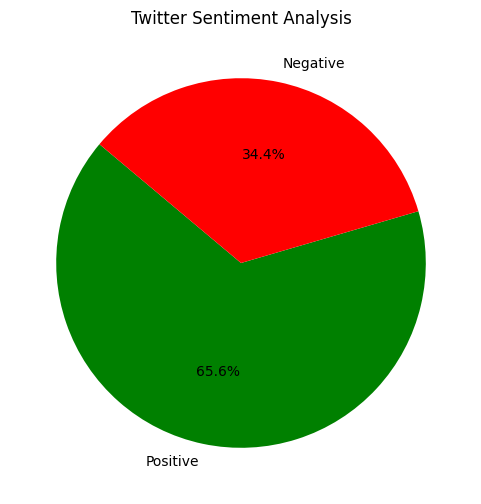

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "predicted_tweets.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Count occurrences of each sentiment
sentiment_counts = df["Sentiment"].value_counts()

# Define labels and sizes
labels = ["Positive", "Negative"]
sizes = [sentiment_counts.get(1, 0), sentiment_counts.get(0, 0)]
colors = ["green", "red"]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Twitter Sentiment Analysis")

# Show plot
plt.show()


In [16]:
# Load the original dataset containing timestamps
timestamp_file_path = "12.3-18.3.csv"
df_predicted = pd.read_csv("predicted_tweets.csv")
df_timestamp = pd.read_csv(timestamp_file_path)

# Convert 'createdAt' to datetime and extract only the date part
df_timestamp['createdAt'] = pd.to_datetime(df_timestamp['createdAt'], errors='coerce')
df_timestamp['Date'] = df_timestamp['createdAt'].dt.date

# Merge predicted sentiment data with timestamps based on index
df_timestamp['Sentiment'] = df_predicted['Sentiment']
df_timestamp.drop(columns=['createdAt'], inplace=True)
df_timestamp.to_csv("senti.csv", index=False)


<ipython-input-16-536872d21d22>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_timestamp['createdAt'] = pd.to_datetime(df_timestamp['createdAt'], errors='coerce')


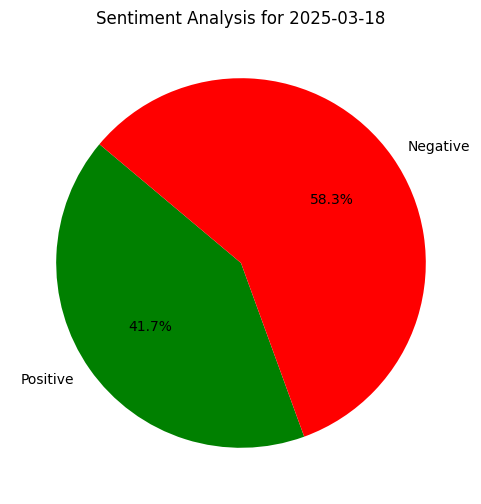

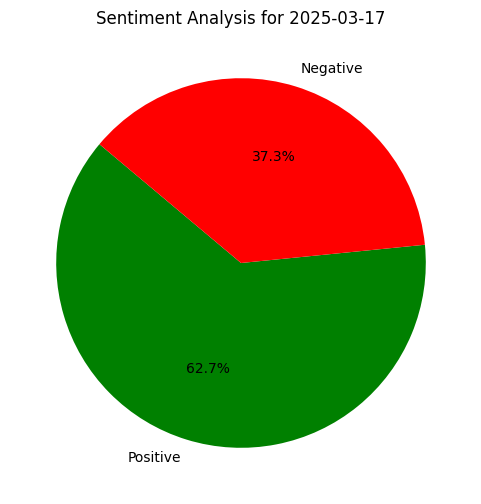

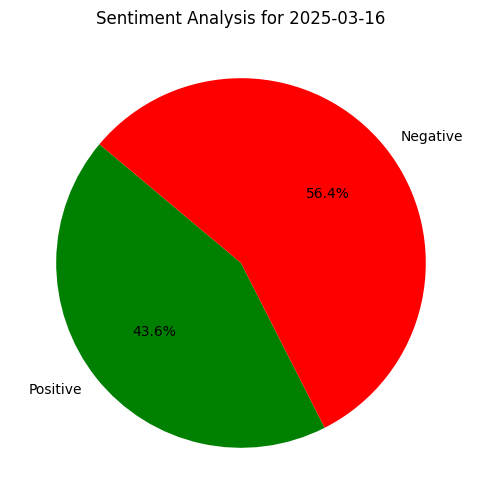

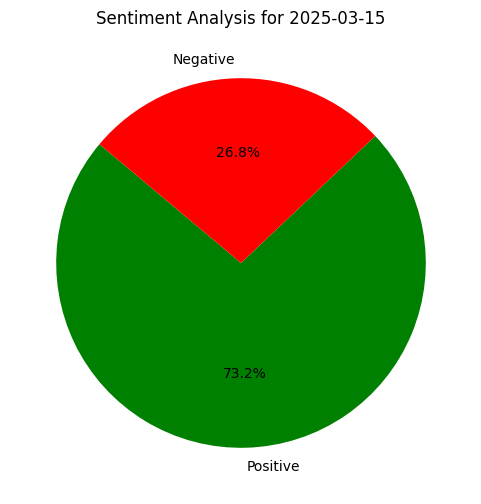

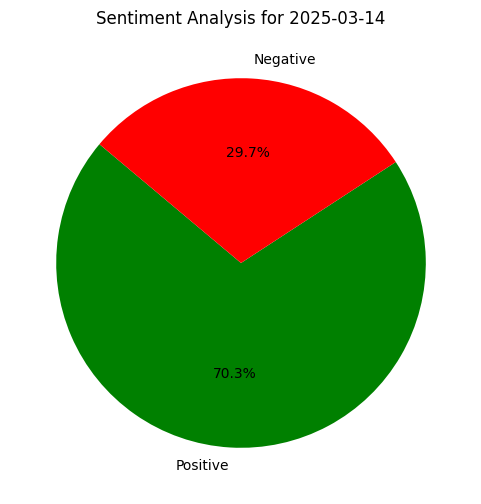

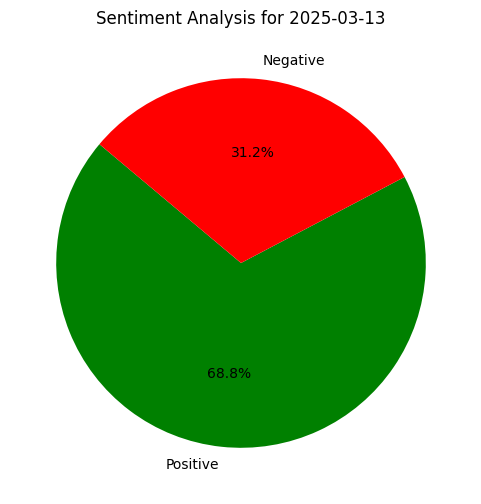

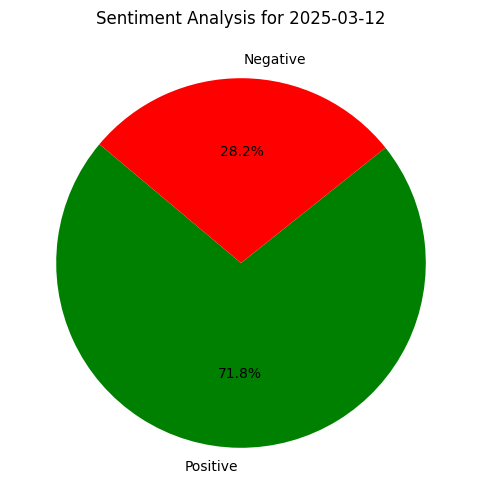

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "senti.csv"
df = pd.read_csv(file_path)



# Get unique dates
unique_dates = df["Date"].unique()

# Generate pie charts for each date
for date in unique_dates:
    sentiment_counts = df[df["Date"] == date]["Sentiment"].value_counts()

    labels = ["Positive", "Negative"]
    sizes = [sentiment_counts.get(1, 0), sentiment_counts.get(0, 0)]
    colors = ["green", "red"]

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
    plt.title(f"Sentiment Analysis for {date}")
    plt.show()
